In [1]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, sys, local, plottools as pl
from matplotlib.pyplot import *

In [2]:
qids_d = ['boss_d01','boss_d02','boss_d03','boss_d04','s16_d01','s16_d02','s16_d03']
qids_n = ['boss_01','boss_02','boss_03','boss_04']
qids_d = ['boss_d01']
qids_n = ['boss_01']
qids_n = []
qids = qids_d + qids_n

In [3]:
aobj = {q: local.init_analysis_params(qid=q) for q in qids}

In [4]:
rlzs = [0,1,13]

In [5]:
xl = {}
for qi, qid in enumerate(qids): 
    for pid in qids[qi:]: 
        print(qid,pid)
        xl[qid,pid] = np.zeros((len(aobj[qid].rlz),aobj[qid].lmax+1))
        for ii, rlz in enumerate(rlzs):
            Talm0 = pickle.load(open(aobj[qid].falm['c']['T'][rlz],"rb"))
            Talm1 = pickle.load(open(aobj[pid].falm['c']['T'][rlz],"rb"))
            xl[qid,pid][ii,:] = cs.utils.alm2cl(aobj[qid].lmax,Talm0,Talm1)

boss_d01 boss_d01


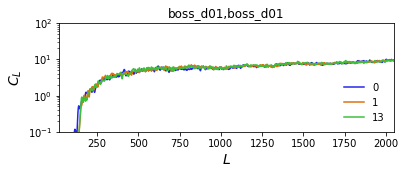

<Figure size 432x144 with 0 Axes>

In [6]:
l = aobj['boss_d01'].l
s = l**4/np.pi * 1e6
for qi, qid in enumerate(qids):
    for pid in qids[qi:]:
        if pid == qid: pl.plot_1dstyle(fsize=[6,2],ymin=1e-1,ymax=1e2,ylog=True)
        if pid != qid: pl.plot_1dstyle(fsize=[6,2],ymin=-1,ymax=1)
        for ii, rlz in enumerate(rlzs):
            plot(l,s*xl[qid,pid][ii,:],label=str(rlz))
        title(pid+','+qid)
        legend()
        show()
        clf()